In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6065e8e4d786b00ec4bf2399b80d50b750a6e8d718d06469707d1909e2b65378
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


#FIFA 19 Data set exploration using pyspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [ ]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Your Code 
df= spark.read.load("2020T2Data.csv", format="csv", header="true", inferSchema="true")
df.head()

Row(ID=158023, Name='L. Messi', Age=31, Photo='https://cdn.sofifa.org/players/4/19/158023.png', Nationality='Argentina', Flag='https://cdn.sofifa.org/flags/52.png', Overall=94, Potential=94, Club='FC Barcelona', Club Logo='https://cdn.sofifa.org/teams/2/light/241.png', value(M)='110.5', wage(K)=565, Special=2202, Preferred Foot='Left', International Reputation=5, Weak Foot=4, Skill Moves=4, Work Rate='Medium/ Medium', Body Type='Messi', Real Face='Yes', Position='RF', Jersey Number=10, Joined='Jul 1, 2004', Loaned From=None, Contract Valid Until='2021', Height=5.7, Height(CM)=173.736, Weight=159.0, Weight(KG)=72.121128, Crossing=84, Finishing=95, HeadingAccuracy=70, ShortPassing=90, Volleys=86, Dribbling=97, Curve=93, FKAccuracy=94, LongPassing=87, BallControl=96, Acceleration=91, SprintSpeed=86, Agility=91, Reactions=95, Balance=95, ShotPower=85, Jumping=68, Stamina=72, Strength=59, LongShots=94, Aggression=48, Interceptions=22, Positioning=94, Vision=94, Penalties=75, Composure=96, M

In [ ]:
from pyspark.sql import functions as F

#Your code for statistics on Age
Age_min=df.agg({"Age": "min"}).collect()[0]
Age_max=df.agg({"Age": "max"}).collect()[0]
Age_mean=df.agg({"Age": "avg"}).collect()[0]
print("Minimum value of Age ",Age_min["min(Age)"])
print("Maximum value of Age ",Age_max["max(Age)"])
print("Mean value of Age ",Age_mean["avg(Age)"])

Minimum value of Age  16
Maximum value of Age  45
Mean value of Age  25.122205745043114


In [ ]:
#Your Code for statistics on Overall
Overall_min=df.agg({"Overall": "min"}).collect()[0]
Overall_max=df.agg({"Overall": "max"}).collect()[0]
Overall_mean=df.agg({"Overall": "avg"}).collect()[0]
print("Minimum value of Overall ",Overall_min["min(Overall)"])
print("Maximum value of Overall ",Overall_max["max(Overall)"])
print("Mean value of Overall ",Overall_mean["avg(Overall)"])


Minimum value of Overall  46
Maximum value of Overall  94
Mean value of Overall  66.23869940132916


In [ ]:
#Your Code for the position having highest Avg Overall  

df.createOrReplaceTempView("FIFA")
spark.sql("SELECT Position, avg(Overall) AS Overall_avg FROM FIFA GROUP BY Position ORDER BY Overall_avg DESC").collect()[0]


Row(Position='LF', Overall_avg=73.86666666666666)

In [ ]:
#Your Code to output top 3 countries with highest Avg Overall
spark.sql("SELECT Nationality, avg(Overall) AS Overall_avg FROM FIFA GROUP BY Nationality ORDER BY Overall_avg DESC LIMIT 3").collect()


[Row(Nationality='United Arab Emirates', Overall_avg=77.0),
 Row(Nationality='Central African Rep.', Overall_avg=73.33333333333333),
 Row(Nationality='Israel', Overall_avg=72.14285714285714)]

In [ ]:
#Your code for the results on Avg Potentials on Country by Position with ordering the results on country by alphabet (show top 10)

import numpy as np
pivot_df=df.groupby(["Nationality"]).pivot("Position").agg(F.avg("Potential"))

#Lastly, you will need to order the results by alphabet.

pivot_df.orderBy("Nationality").limit(10).show()

#Your Code to identify the position having highest Avg Potential for Australia

spark.sql("SELECT Position, Avg(Potential) as Potential_Average from FIFA WHERE Nationality='Australia' GROUP BY Position ORDER BY Potential_Average DESC LIMIT 1").show()

+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your Code for plot
age_group_df=spark.sql("SELECT Age,Avg(Potential) as Average_Potential, Avg(Overall) as Average_Overall FROM FIFA GROUP BY Age")
pandas_df=age_group_df.orderBy("Age").toPandas()


,Age,Average_Potential,Average_Overall
0,16,73.190476,54.452381
1,17,74.339100,56.404844
2,18,73.530055,57.741803
3,19,73.146484,59.583008
4,20,73.213710,61.858871
5,21,72.957836,63.480675
6,22,72.819403,64.994030
7,23,72.555556,66.244745
8,24,72.079529,67.306333
9,25,71.290371,67.973465


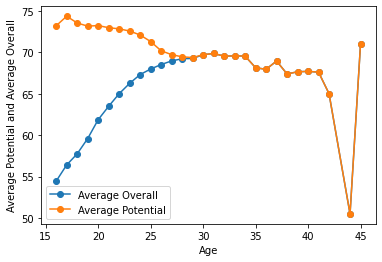

In [ ]:
fig,ax=plt.subplots()
ax.plot(pandas_df.Age, pandas_df.Average_Overall, marker="o")
ax.set_xlabel("Age")
ax.set_ylabel("Average Potential and Average Overall")
ax.plot(pandas_df.Age, pandas_df.Average_Potential, marker="o")
ax.legend(['Average Overall','Average Potential'])
plt.show()

In [ ]:
age_group_df.head()

Row(Age=31, Average_Potential=69.85007072135785, Average_Overall=69.85007072135785)

In [ ]:
age_group_df.orderBy(F.desc("Average_Potential")).limit(1).show()

+---+-----------------+-----------------+
|Age|Average_Potential|  Average_Overall|
+---+-----------------+-----------------+
| 17|74.33910034602076|56.40484429065744|
+---+-----------------+-----------------+



##  Unsupervised Learning: Kmeans


In [ ]:
# Your code to select relevant features and filter the data by removing the GK
df_d = df.where((df.Position!='GK'))
columns_to_drop = ['Name', 'Age', 'Photo', 'Nationality', 'Flag','Overall', 'Potential', 'Club', 'Club Logo', 'value(M)',
                  'wage(K)', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate','Body Type', 
                   'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'GKDiving', 'GKHandling',
                   'GKKicking', 'GKPositioning','GKReflexes', 'Release Clause(M)']
df_d = df_d.drop(*columns_to_drop)

df_d.show(15)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------


   # Created a new column called Position_Group with only DEF/FWD/MID



In [ ]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF=  ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD=  ['RF','LF','LW','RS','RW','LS','CF','ST'] 
MID=  ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
#df_d = df_d.withColumn('Position_Group', df_d.Position)
df_kmeans_new = df_d.select( "*", when (col("Position").rlike("|".join(DEF)), 'DEF'). 
                            when (col("Position").rlike("|".join(FWD)), 'FWD').
                            when (col("Position").rlike("|".join(MID)), 'MID').alias("Position_Group")
                            
)
df_kmeans_new.show(20)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from pyspark import SparkContext
import pandas as pd
import numpy as np

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

cost = np.zeros(20)

for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans_.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans_)



Text(0.5, 1.0, 'Elbow Plot')

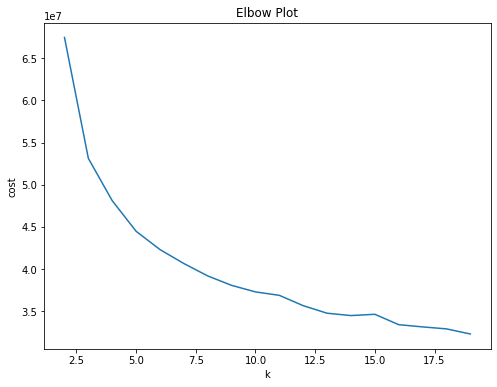

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.set_title('Elbow Plot')

# Your Code


In [ ]:
k = 8
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans_)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]
[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]
[172.46617578  73.21508518  65.18944637  68.70069204  57.79541522
  69.00043253  64.56055363  73.22923875  67.01859862  61.3399654
  60.86245675  72.86548443  76.2

In [ ]:
from pyspark.sql import SQLContext

transformed = model.transform(df_kmeans_).select('id', 'prediction')
rows = transformed.collect()
print(rows[:5])
df_kmeans_.show(5)

[Row(id=158023, prediction=2), Row(id=20801, prediction=2), Row(id=190871, prediction=2), Row(id=192985, prediction=4), Row(id=183277, prediction=2)]
+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
|192985|[155.7528,69.8531...|
|183277|[176.784,73.93549...|
+------+--------------------+
only showing top 5 rows



In [ ]:
spark= SparkSession.builder.getOrCreate()
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql import *
from pyspark.sql.types import *

sql = SQLContext(spark)
df_kmeans_pred_1 = sql.createDataFrame(rows)
df_kmeans_pred_1.show()
df_kmeans_pred_ = df_kmeans_new.join(df_kmeans_pred_1, on=['ID'], how='inner')
df_kmeans_pred_.show()


+------+----------+
|    id|prediction|
+------+----------+
|158023|         2|
| 20801|         2|
|190871|         2|
|192985|         4|
|183277|         2|
|177003|         4|
|176580|         2|
|155862|         4|
|188545|         2|
|182521|         4|
|182493|         0|
|168542|         2|
|215914|         4|
|211110|         2|
|202126|         2|
|194765|         2|
|189511|         4|
|179813|         2|
|153079|         2|
|138956|         0|
+------+----------+
only showing top 20 rows

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+----------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|Lo

In [ ]:
df_kmeans_pred_.groupby('prediction').pivot("Position_Group").count().sort("prediction", ascending = True).show()

+----------+----+----+----+
|prediction| DEF| FWD| MID|
+----------+----+----+----+
|         0|1230|  11| 967|
|         1|1462|   2| 117|
|         2|   4|1112|1195|
|         3|1266|   1|  77|
|         4| 599|  71|1720|
|         5|   8| 535|1486|
|         6|null|1648| 135|
|         7|1297|  38|1141|
+----------+----+----+----+



In [ ]:
df_kmeans_pred_ = df_kmeans_pred_.withColumnRenamed('prediction', 'Cluster')
df_kmeans_pred_.show(2)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+-------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|Cluster|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------

# Supervised Learning: Classification on Position_Group


We use player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.



# Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input. Potion_group is the target

In [ ]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(3)


+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [ ]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420166...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [ ]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

In [ ]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test= predict_test.select("Target","prediction")
predict_train.show(5)
predict_test= predict_test


+--------------------+--------------+--------------------+------+--------------------+--------------------+----------+
|            features|Position_Group|     Scaled_features|Target|       rawPrediction|         probability|prediction|
+--------------------+--------------+--------------------+------+--------------------+--------------------+----------+
|[155.448,57.15259...|           MID|[11.5654904600483...|     2|[1.40171145563638...|[0.37482653624515...|       2.0|
|[155.448,58.05977...|           MID|[11.5654904600483...|     2|[0.40813205042578...|[0.07051039097986...|       2.0|
|[155.448,60.78132...|           DEF|[11.5654904600483...|     1|[-3.1531593363475...|[0.00361447660201...|       1.0|
|[155.448,62.14210...|           MID|[11.5654904600483...|     2|[0.10407430140494...|[0.20497593747010...|       2.0|
|[155.448,63.04928...|           MID|[11.5654904600483...|     2|[-1.3747129962200...|[0.01014249199867...|       2.0|
+--------------------+--------------+-----------

In [ ]:
from sklearn.metrics import confusion_matrix

Target_m = predict_test.select(['Target']).collect()
Predict_m= predict_test.select(['prediction']).collect()


print("Confusion matrix:")
confusion_matrix(Target_m, Predict_m)


Confusion matrix:


array([[ 821,    7,  210],
       [   2, 1466,  307],
       [ 194,  240, 1637]])

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(Target_m, Predict_m))




Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1038
           1       0.86      0.83      0.84      1775
           2       0.76      0.79      0.77      2071

    accuracy                           0.80      4884
   macro avg       0.81      0.80      0.80      4884
weighted avg       0.80      0.80      0.80      4884



In [ ]:
train_data, test_data = raw_data_.randomSplit([0.7, 0.3], seed=12)
train_data.show(5)

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[155.448,57.15259...|           MID|[11.5654904600483...|     2|
|[155.448,58.05977...|           MID|[11.5654904600483...|     2|
|[155.448,60.78132...|           DEF|[11.5654904600483...|     1|
|[155.448,62.14210...|           MID|[11.5654904600483...|     2|
|[155.448,63.04928...|           MID|[11.5654904600483...|     2|
+--------------------+--------------+--------------------+------+
only showing top 5 rows



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import DecisionTreeClassifier



# Your code 


#Random Classifier

In [ ]:
from pyspark.ml import Pipeline
rf = RandomForestClassifier().setLabelCol("Target").setFeaturesCol("Scaled_features").setNumTrees(4)

pipeline = Pipeline(stages=[rf])

paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 7]) \
    .addGrid(rf.maxBins, [10,20]) \
    .build()

evaluator = MulticlassClassificationEvaluator().setLabelCol("Target")

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5)

model_rf = crossval.fit(train_data)


predict_test_rf=model_rf.transform(test_data)
predict_test_rf= predict_test_rf.select("Target","prediction")
predict_test_rf.show(5)



evaluator.evaluate(predict_test_rf)


+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     0|       2.0|
|     2|       2.0|
+------+----------+
only showing top 5 rows



0.8315644682641298

In [ ]:
bp= model_rf.bestModel
bestmodel = bp.stages[-1]
bestparam= bestModel.extractParamMap()
bestparam

{Param(parent='RandomForestClassifier_8eca22c0102c', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='RandomForestClassifier_8eca22c0102c', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='RandomForestClassifier_8eca22c0102c', name='featureSubsetStrategy', doc='The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n].'): 'auto',
 Param(parent='RandomForestClassifier_8eca22c0102c', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='RandomForestClassifier_8eca22c0

# Naive Bayes

In [ ]:
# Your code
nb = NaiveBayes().setLabelCol("Target").setFeaturesCol("Scaled_features")
pipeline = Pipeline(stages=[nb])

paramGrid = (ParamGridBuilder()
             .addGrid(nb.smoothing, [1.0, 0.5])
             .build())
evaluator = MulticlassClassificationEvaluator().setLabelCol("Target")

crossval_nb = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5)

model_nb = crossval_nb.fit(train_data)


predict_test_nb=model_nb.transform(test_data)
predict_test_nb= predict_test_nb.select("Target","prediction")
predict_test_nb.show(5)
print("Accuracy:")
evaluator.evaluate(predict_test_nb)


+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     0|       0.0|
|     2|       0.0|
+------+----------+
only showing top 5 rows

Accuracy:


0.7674492904781833

In [ ]:
bp_nb= model_nb.bestModel
bestmodel_ = bp_nb.stages[-1]
bestparam_nb= bestmodel_.extractParamMap()
bestparam_nb

{Param(parent='NaiveBayes_779fc3e945da', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='NaiveBayes_779fc3e945da', name='labelCol', doc='label column name'): 'Target',
 Param(parent='NaiveBayes_779fc3e945da', name='modelType', doc='The model type which is a string (case-sensitive). Supported options: multinomial (default) and bernoulli.'): 'multinomial',
 Param(parent='NaiveBayes_779fc3e945da', name='predictionCol', doc='prediction column name'): 'prediction',
 Param(parent='NaiveBayes_779fc3e945da', name='probabilityCol', doc='Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities'): 'probability',
 Param(parent='NaiveBayes_779fc3e945da', name='rawPredictionCol', doc='raw prediction (a.k.a. confidence) column name'): 'rawPrediction',
 Param(parent='NaiveBayes_779fc3e945da', name='smoothing', doc='The s

#Decison Tree Classifier

In [ ]:
#define decision tree model

Dtc=DecisionTreeClassifier().setLabelCol("Target").setFeaturesCol("Scaled_features")
pipeline = Pipeline(stages=[Dtc])

paramGrid_dt = ParamGridBuilder() \
     .addGrid(Dtc.maxDepth, [5, 7]) \
     .addGrid(Dtc.maxBins, [10,20]) \
     .build()
evaluator = MulticlassClassificationEvaluator().setLabelCol("Target")
crossval_dt = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid_dt,
                              evaluator=evaluator,
                              numFolds=5)

model_dt = crossval_dt.fit(train_data)


predict_test_dt=model_dt.transform(test_data)
predict_test_dt= predict_test_dt.select("Target","prediction")
predict_test_dt.show(5)
print("Accuracy:")
evaluator.evaluate(predict_test_dt)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 5 rows

Accuracy:


0.8142460827338078

In [ ]:
bp= model_dt.bestModel
bestmodel_dt = bp.stages[-1]
bestparam= bestmodel_dt.extractParamMap()
bestparam

{Param(parent='DecisionTreeClassifier_157e63636cf0', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='DecisionTreeClassifier_157e63636cf0', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='DecisionTreeClassifier_157e63636cf0', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='DecisionTreeClassifier_157e63636cf0', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'gini',
 Param(parent='DecisionTreeClassifier_157e63636cf0', name='labelCol', doc='label column name'